In [2]:
import sympy as sp

# Define the variables
x1, x2 = sp.symbols('x1 x2')

# Define the vector x
x = sp.Matrix([x1, x2])

# Define the matrix A
A = sp.Matrix([[2, 1], [1, 20]])

# Define the vector b
b = sp.Matrix([5, 3])

# Define the function f(x)
f = (1/2) * x.dot(A * x) - b.dot(x)

# Calculate the gradient of f
gradient_f = sp.Matrix([sp.diff(f, var) for var in (x1, x2)])

# Display the gradient
gradient_f

Matrix([
[ 2.0*x1 + 1.0*x2 - 5],
[1.0*x1 + 20.0*x2 - 3]])

array([2.48717457, 0.0256413 ])

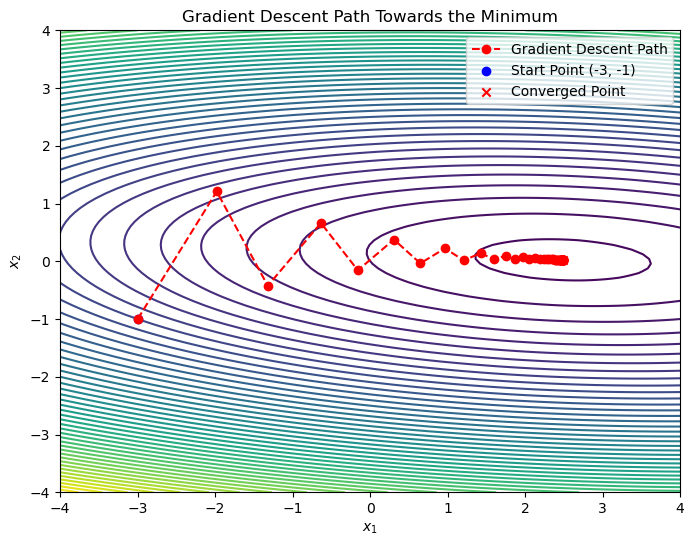

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols
x1, x2 = sp.symbols('x1 x2')

# Define the vector x
x = sp.Matrix([x1, x2])

# Define the matrix A and vector b
A = sp.Matrix([[2, 1], [1, 20]])
b = sp.Matrix([5, 3])

# Define the function f(x)
f = (1/2) * x.dot(A * x) - b.dot(x)

# Calculate the gradient of f
gradient_f = sp.Matrix([sp.diff(f, var) for var in (x1, x2)])

# Convert gradient to a numerical function using lambdify
gradient_func = sp.lambdify((x1, x2), gradient_f, 'numpy')

# Gradient descent parameters
gamma = 0.085
x_current = np.array([-3, -1], dtype=float)  # Initial point
tolerance = 1e-6  # Convergence tolerance
max_iterations = 1000  # Maximum number of iterations

# Lists to store the trajectory of x
trajectory = [x_current.copy()]

# Perform gradient descent
for _ in range(max_iterations):
    grad = np.array(gradient_func(x_current[0], x_current[1])).flatten()
    x_next = x_current - gamma * grad
    trajectory.append(x_next.copy())
    
    # Check for convergence
    if np.linalg.norm(x_next - x_current) < tolerance:
        break
    x_current = x_next

# Convert the trajectory into a NumPy array for easy plotting
trajectory = np.array(trajectory)
display(trajectory[-1])

# Plotting the function contours and the gradient descent path
x1_vals = np.linspace(-4, 4, 100)
x2_vals = np.linspace(-4, 4, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = (1/2) * (2 * X1**2 + 2 * X1 * X2 + 20 * X2**2) - 5 * X1 - 3 * X2

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro--', label='Gradient Descent Path')
plt.scatter(-3, -1, color='blue', marker='o', label='Start Point (-3, -1)')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', marker='x', label='Converged Point')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Gradient Descent Path Towards the Minimum')
plt.legend()
plt.show()